In [3]:
import pandas as pd
import fiona
import matplotlib.pyplot as plot
import geopandas as gpd

basinlocations=pd.read_csv(r"D:\Maps\basindata\basins.csv",encoding = 'unicode_escape')
basinlocations

,BasinName,Latitude,Longitude,Latitude1,Longitude1,License ID,CompanyName,SiteImages
0,Cavery,8°12',78°00',8.20,78.0000,A1,AAAAAAAAAA,CaveryImage
1,Krishna_godavari(KG),16°50',82°11',16.83,82.1833,B2,BBBBBBBBBB,KG BasinImage
2,Damodar,22°15',84°30',22.25,84.5000,C3,CCCCCCCCCC,DamodarImage
3,Assam,25°93',90°55',26.55,90.9100,D4,DDDDDDDDDD,AssamImage
4,Ganga,21°06',73°02',21.10,73.0300,E5,EEEEEEEEEE,GangaImage
5,Cambay,21°24',71°30',21.40,71.5000,F6,FFFFFFFFFF,CambayImnage
6,Mumbai Offshore,19°00',72°52',19.00,72.8600,G7,GGGGGGGGGG,Mumbai OffshoreImage
7,Rajathan,27°00',77°00',27.00,77.0000,H8,HHHHHHHHHH,RajathanImage


In [4]:
schemapoints={
    'geometry':'Point',
    'properties':[('Name','str')]
}

In [6]:
KGMaplocationsshp=fiona.open('D:\Maps\generatedmaps\location.shp',mode='w',driver='ESRI Shapefile',schema=schemapoints,crs="EPSG:24373")

CRSError: Invalid input to create CRS: EPSG:24373

In [68]:
for index,row in basinlocations.iterrows():
    rowDict = {
    'geometry':{'type':'Point','coordinates':(row.Longitude1,row.Latitude1)},
    'properties':{'Name':row.BasinName},
    }
    KGMaplocationsshp.write(rowDict)
KGMaplocationsshp.close()

<AxesSubplot:>

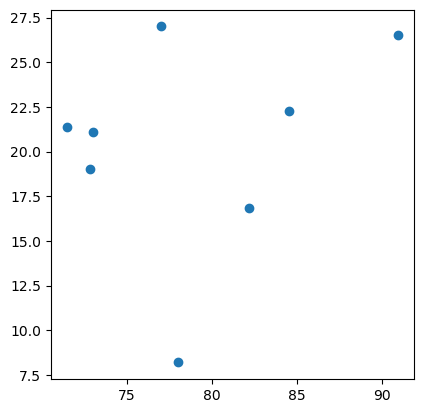

In [69]:
KGlocation=gpd.read_file(r"D:\Maps\generatedmaps\location.shp")
KGlocation.plot()

In [71]:
basinborderlines=pd.read_csv(r"D:\Maps\basindata\KG BasinLines.csv",encoding = 'unicode_escape')
basinborderlines

,BorderPoints,Latitude,Longitude,Latitude1,Longitude1
0,Left_Bottom,7°12',65°00',8,65
1,Right_Bottom,7°12',100°00',8,100
2,Right_Top,40°93',100°00',40,100
3,Left_Top,40°93',65°00',40,65
4,Left_Bottomclose,7°12',65°00',8,65


In [72]:
schemalines={
    'geometry':'LineString',
    'properties':[('Name','str')]
}

In [73]:
GMaplines=fiona.open('D:\Maps\generatedmaps\lines.shp',mode='w',driver='ESRI Shapefile',schema=schemalines,crs="EPSG:4326")

In [74]:
xyList=[]
rowName=''
for index,row in basinborderlines.iterrows():
    xyList.append((row.Longitude1,row.Latitude1))
    rowName=row.BorderPoints
xyList[:5]

rowDict={
    'geometry':{'type':'LineString','coordinates':xyList},
    'properties':{'Name':rowName},
}
GMaplines.write(rowDict)
GMaplines.close()

<AxesSubplot:>

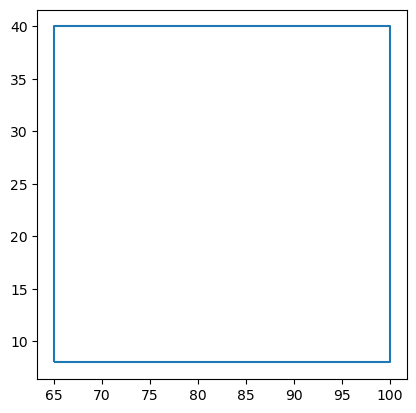

In [75]:
KGlines=gpd.read_file(r"D:\Maps\generatedmaps\lines.shp")
KGlines.plot()

In [76]:
basinboarder=pd.read_csv(r"D:\Maps\basindata\KG BasinArea.csv",encoding = 'unicode_escape')
basinboarder

,BorderPoints,Latitude,Longitude,Latitude1,Longitude1
0,LeftBottom,7°12',65°00',7.20,65
1,RightBottom,8°12',100°00',8.00,100
2,RightTop,40°93',100°00',41.55,100
3,LeftTop,40°93',65°00',41.55,65
4,LeftBottomClose,7°12',65°00',7.20,65


In [77]:
schemapoly={
    'geometry':'Polygon',
    'properties':[('Name','str')]
}

In [78]:
KGpolyShp = fiona.open('D:\Maps\generatedmaps\Poly1.shp', mode='w', driver='ESRI Shapefile',
          schema = schemapoly, crs = "EPSG:4326")

In [79]:
xyList1=[]
rowName=''

for index,row in basinboarder.iterrows():
    xyList1.append((row.Longitude1,row.Latitude1))
    rowName=row.BorderPoints
xyList[:5]

[(65, 8), (100, 8), (100, 40), (65, 40), (65, 8)]

In [80]:
rowDict={
    'geometry':{'type':'Polygon','coordinates':[xyList1]},
    'properties':{'Name':rowName},
}
KGpolyShp.write(rowDict)
KGpolyShp.close()

<AxesSubplot:>

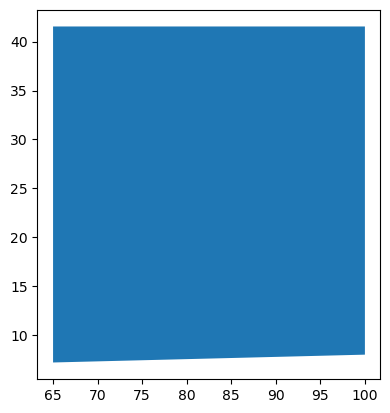

In [81]:
KGpoly=gpd.read_file(r"D:\Maps\generatedmaps\Poly1.shp")
KGpoly.plot()

In [2]:
ind1=gpd.read_file(r"D:\Maps\basindata\IND_adm\IND_adm1.shp")
ind1.plot()

NameError: name 'gpd' is not defined

<AxesSubplot:>

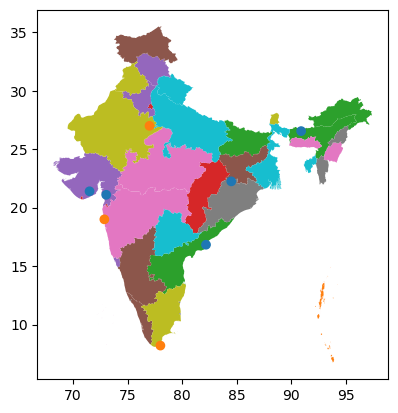

In [83]:
union=gpd.overlay(KGlocation,ind1,how='union',keep_geom_type=False)
union.plot(cmap='tab10')

<AxesSubplot:>

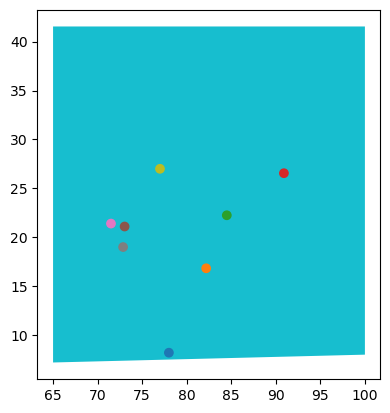

In [84]:
union=gpd.overlay(KGlocation,KGpoly,how='union',keep_geom_type=False)
union.plot(cmap='tab10')

<AxesSubplot:>

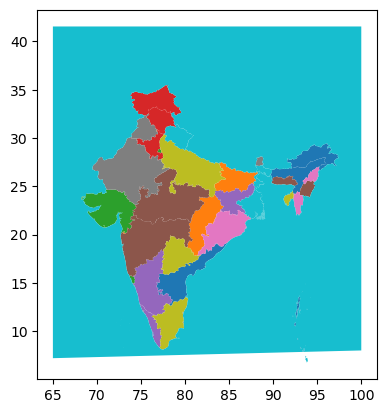

In [85]:
union1=gpd.overlay(ind1,KGpoly,how='union',keep_geom_type=False)
union1.plot(cmap='tab10')

In [86]:
KGpoly

,Name,geometry
0,LeftBottomClose,"POLYGON ((65.00000 7.20000, 65.00000 41.55000,..."


In [87]:
ind1

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,105,IND,India,6,Chandigarh,Union Territor,Union Territory,None,None,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,105,IND,India,7,Chhattisgarh,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,105,IND,India,8,Dadra and Nagar Haveli,Union Territor,Union Territory,None,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,105,IND,India,9,Daman and Diu,Union Territor,Union Territory,None,None,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,105,IND,India,10,Delhi,Union Territor,Union Territory,None,None,"POLYGON ((77.32713 28.68516, 77.32539 28.68250..."


In [88]:
KGlocation.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      8 non-null      object  
 1   geometry  8 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 256.0+ bytes


In [89]:
KGlocation['Value of the Project']='500'
KGlocation.head()

,Name,geometry,Value of the Project
0,Cavery,POINT (78.00000 8.20000),500
1,Krishna_godavari(KG),POINT (82.18330 16.83000),500
2,Damodar,POINT (84.50000 22.25000),500
3,Assam,POINT (90.91000 26.55000),500
4,Ganga,POINT (73.03000 21.10000),500


In [95]:
KGlocation['Value by govt'][2]='100'
KGlocation.head()

C:\Users\mural\AppData\Local\Temp\ipykernel_18468\2590701694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KGlocation['Value by govt'][2]='100'


,Name,geometry,Value of the Project,Value by govt
0,Cavery,POINT (78.00000 8.20000),500,300
1,Krishna_godavari(KG),POINT (82.18330 16.83000),500,300
2,Damodar,POINT (84.50000 22.25000),500,100
3,Assam,POINT (90.91000 26.55000),200,300
4,Ganga,POINT (73.03000 21.10000),500,300


In [96]:
KGlocation['Value by Resource1']= 100

In [97]:
KGlocation['Value by govt2']= 300
KGlocation.head()

,Name,geometry,Value of the Project,Value by govt,Value by Resource1,Value by govt2
0,Cavery,POINT (78.00000 8.20000),500,300,100,300
1,Krishna_godavari(KG),POINT (82.18330 16.83000),500,300,100,300
2,Damodar,POINT (84.50000 22.25000),500,100,100,300
3,Assam,POINT (90.91000 26.55000),200,300,100,300
4,Ganga,POINT (73.03000 21.10000),500,300,100,300


In [99]:
KGlocation.drop(['Value by Resource1'],inplace=True, axis=1)
KGlocation

,Name,geometry,Value of the Project,Value by govt,Value by govt2
0,Cavery,POINT (78.00000 8.20000),500,300,300
1,Krishna_godavari(KG),POINT (82.18330 16.83000),500,300,300
2,Damodar,POINT (84.50000 22.25000),500,100,300
3,Assam,POINT (90.91000 26.55000),200,300,300
4,Ganga,POINT (73.03000 21.10000),500,300,300
5,Cambay,POINT (71.50000 21.40000),500,300,300
6,Mumbai Offshore,POINT (72.86000 19.00000),500,300,300
7,Rajathan,POINT (77.00000 27.00000),500,300,300
